<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#比特币价格预测" data-toc-modified-id="比特币价格预测-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>比特币价格预测</a></span></li><li><span><a href="#数据读取" data-toc-modified-id="数据读取-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>数据读取</a></span></li><li><span><a href="#数据转换与清洗" data-toc-modified-id="数据转换与清洗-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>数据转换与清洗</a></span></li><li><span><a href="#可视化数据探索" data-toc-modified-id="可视化数据探索-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>可视化数据探索</a></span></li><li><span><a href="#模型训练" data-toc-modified-id="模型训练-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>模型训练</a></span><ul class="toc-item"><li><span><a href="#ARMA模型" data-toc-modified-id="ARMA模型-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>ARMA模型</a></span></li><li><span><a href="#预测未来八个月" data-toc-modified-id="预测未来八个月-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>预测未来八个月</a></span></li></ul></li></ul></div>

### 比特币价格预测
项目说明：根据过往比特币价格数据，采用ARMA模型预测未来一段时间的价格

### 数据读取

In [ ]:
import pandas as pd
from  statsmodels.tsa.arima_model import ARMA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.

In [58]:
df_data = pd.read_csv('./bitcoin_2012-01-01_to_2018-10-31.csv')
df_data.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011/12/31,4.465000,4.482500,4.465000,4.482500,23.829470,106.330084,4.471603
1,2012/1/1,4.806667,4.806667,4.806667,4.806667,7.200667,35.259720,4.806667
2,2012/1/2,5.000000,5.000000,5.000000,5.000000,19.048000,95.240000,5.000000
3,2012/1/3,5.252500,5.252500,5.252500,5.252500,11.004660,58.100651,5.252500
4,2012/1/4,5.200000,5.223333,5.200000,5.223333,11.914807,63.119578,5.208159


### 数据转换与清洗

In [59]:
df_data = df_data.dropna()
df_data.index = pd.to_datetime(df_data['Timestamp'])

### 可视化数据探索
分别按天、周、月、季度查看价格走势

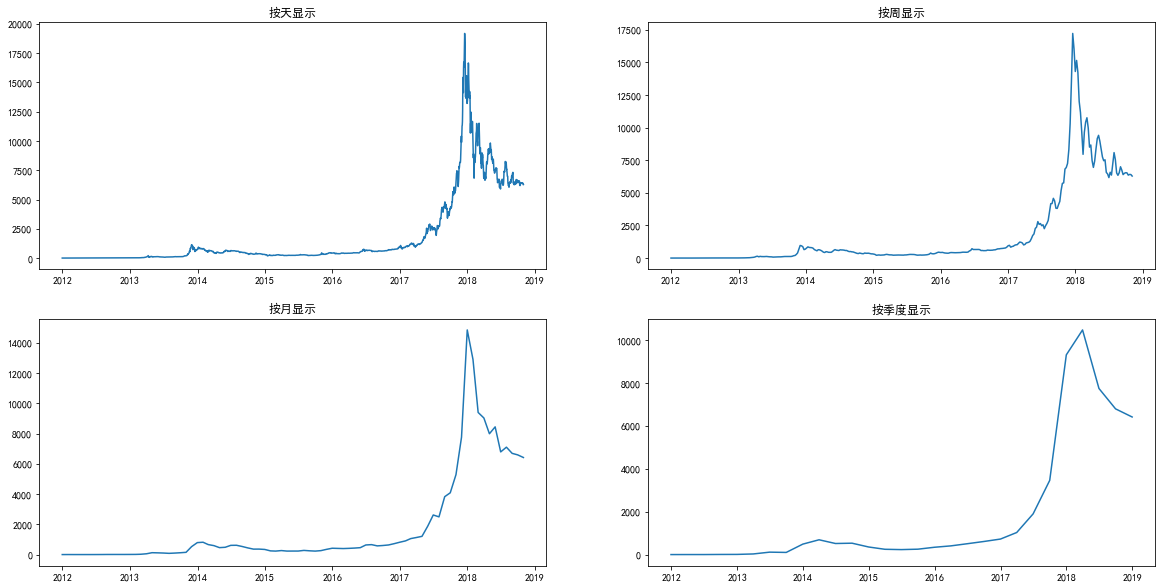

In [60]:
plt.rcParams['font.sans-serif'] = ['SimHei'] # 用来正常显示中文标签
fig, axes = plt.subplots(2,2)
fig.set_size_inches(20,10)
axes[0,0].plot(df_data['Weighted_Price'])
axes[0,0].axes.set_title('按天显示')
axes[0,1].plot(df_data.resample('W').mean()['Weighted_Price'])
axes[0,1].axes.set_title('按周显示')
axes[1,0].plot(df_data.resample('M').mean()['Weighted_Price'])
axes[1,0].axes.set_title('按月显示')
axes[1,1].plot(df_data.resample('Q').mean()['Weighted_Price'])
axes[1,1].axes.set_title('按季度显示')
plt.show()

* 结论采用按周的采样结果，因为与原始数据最为贴近，且能让数据压缩，提高训练速度

### 模型训练

In [63]:
df_data_W = df_data.resample('W').mean()

#### ARMA模型

In [106]:
ps_qs = [[p,q] for xp in range(1,5) for q in range(1,5)]
best_parameter = {'min_aic':float('inf'), 'p':0, 'q':0}
for p, q in ps_qs:
    arma = ARMA(df_data_W['Weighted_Price'], order=(p, q)).fit()
    if arma.aic < best_parameter['min_aic']:
        best_parameter['min_aic'] = arma.aic
        best_parameter['p'] = p
        best_parameter['q'] = q
best_arma = ARMA(df_data_W['Weighted_Price'], order=(best_parameter['p'], best_parameter['q'])).fit()
print('最佳参数', best_parameter)

最佳参数 {'min_aic': 5267.171069704773, 'p': 4, 'q': 3}


#### 预测未来八个月

In [125]:
predict = best_arma.predict(0, len(df_data_W)+8*4)

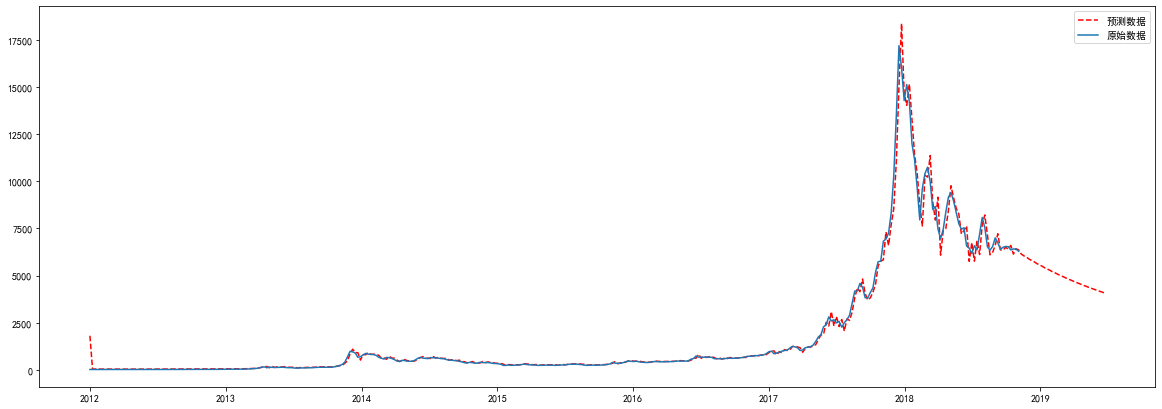

In [126]:
plt.figure(figsize=(20,7))
plt.plot(predict, linestyle='--', color='r', label='预测数据')
plt.plot(df_data_W['Weighted_Price'], label='原始数据')
plt.legend()
plt.show()

* 结论：根据预测，未来8个月比特币价格持续走低